In [15]:
#Importing libs and csv file
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import collections
import statistics as stat
import joblib

#scikit-learn lib for linear regression and splitting test/model data
from sklearn.model_selection import train_test_split   #Splitting data 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from collections import Counter

#reading csv file
data_frame =pd.read_csv('heart.csv')
data_frame2 =pd.read_csv('heart.csv')


In [16]:
#Spliting DataSet

#x with categorical data which we cant deal with
x = data_frame.drop('HeartDisease',axis=1)
#y only helds Heart Disease
y = data_frame.HeartDisease
#modified x terminates all categorical data and make 'dummies'-you may google this-
modified_x = pd.get_dummies(x)
modified_x.to_csv("meow.csv", index=False)

#Drawing functions definitions ~Nour
#####################################################################################################################
def draw_bar_chart(my_plt, x_axis, y_axis, x_label):
    my_plt.bar(x_axis, y_axis, color='#ffa9a8', width=0.7, label=x_label, edgecolor="#ffea94")
    my_plt.xlabel(x_label)
    my_plt.ylabel('Number of people')
    my_plt.title("Observations of " + x_label)
    my_plt.legend()
    my_plt.show()

def draw_pie_chart(my_plt, labels, frequency, title):
    color = ["#ffa9a8", "#ffea94", "#a5cbef", "#5cc0bb"]
    my_plt.pie(frequency, labels=labels, autopct="%.1f%%", colors=color, shadow=True)
    my_plt.title("Observations of " + title)
    my_plt.legend(title=title)
    my_plt.show()

def draw_histogram(my_plt, my_data, title):
    x_axis = my_data.loc[:, title]
    median = x_axis.median()
    mean = x_axis.mean()
    mode = stat.mode(x_axis)

    my_plt.hist(x_axis, edgecolor='#ffea94', color='#ffa9a8')
    my_plt.axvline(median, color='#d9534f', label='median', linewidth=3)
    my_plt.axvline(mean, color='#41b6e6', label='mean', linewidth=3)
    my_plt.axvline(mode, color='#96ceb4', label='moda', linewidth=3)

    my_plt.xlabel(title)
    my_plt.title("Observations of " + title)
    my_plt.legend()
    my_plt.show()

def draw_boxplot(my_plt, my_data, title):
    x_axis = my_data.loc[:, title]
    my_plt.boxplot(x_axis, vert=False, showmeans=True, meanline=True)

    my_plt.title("Box plot for " + title)
    my_plt.xlabel(title)
    my_plt.show()

def draw_scatter_plot(my_data, my_plt, x_axis, y_axis):
    my_plt.scatter(my_data[x_axis], my_data[y_axis])
    my_plt.xlabel(x_axis)
    my_plt.ylabel(y_axis)
    my_plt.title("Scatter plot to show relation between " + x_axis + " and " + y_axis)
    my_plt.show()

def calculate_frequency_and_draw(my_data, my_plt, x_label):

    column_data = []  # to add data
    x_axis = []  # to set data for x-axis
    y_axis = []  # to set data for y-axis

    for i in my_data[x_label]:
        column_data.append(i)

    main_data = collections.Counter(column_data)  # to count how many times number appear
    for value, frequency in main_data.items():
        x_axis.append(value)
        y_axis.append(frequency)
    draw_bar_chart(my_plt, x_axis, y_axis, x_label)
    draw_pie_chart(my_plt, x_axis, y_axis, x_label)


def calculate_IQR(data):
    q3, q1 = np.percentile(data, [75, 25])
    IQR = q3-q1
    return IQR


def calculate_central_tendency_and_dispersion(all_data, data_col):
    my_central_tendency = all_data.loc[:, data_col]

    mean = my_central_tendency.mean()
    median = my_central_tendency.median()
    mode = stat.multimode(my_central_tendency)

    print("********** Central Tendency For " + data_col + " **********\n")
    print("The mean of " + data_col + " is "+str(mean))
    print("The median of " + data_col + " is "+str(median))
    print("The mode of " + data_col + " is " + str(mode)+"\n")

    if len(mode) == 2:
        print("The distribution shape is BIMODAL")
    else:
        if mode[0] < median:
            print("The distribution shape is POSITIVE SKEWNESS")
        elif mode[0] > median:
            print("The distribution shape is NEGATIVE SKEWNESS")
        else:
            print("The distribution shape is NORMAL DISTRIBUTION")

            print("\n************************************************************************\n")
    print("********** Dispersion For " + data_col + " **********\n")
    print("The variance of " + data_col + " is "+str(my_central_tendency.var()))
    print("The standard deviation of " + data_col + " is "+str(my_central_tendency.std()))
    print("The Range of data : ")
    print("\nMinimum Value = " + str(min(my_central_tendency)))
    print("Maximum Value = " + str(max(my_central_tendency)))
    print("\nThe IQR of " + data_col + " is "+str(calculate_IQR(my_central_tendency)))

#####################################################################################################################



In [17]:
data_frame.describe()
# for i in data_frame:
#calculate_central_tendency_and_dispersion(data_frame ,'Oldpeak')

,HeartDisease,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,Age
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,0.553377,0.789760,132.396514,244.628758,0.233115,136.809368,0.404139,0.887364,53.510893
std,0.497414,0.407701,18.514154,53.318031,0.423046,25.460334,0.490992,1.066570,9.432617
min,0.000000,0.000000,0.000000,85.000000,0.000000,60.000000,0.000000,-2.600000,28.000000
25%,0.000000,1.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000,47.000000
50%,1.000000,1.000000,130.000000,244.600000,0.000000,138.000000,0.000000,0.600000,54.000000
75%,1.000000,1.000000,140.000000,267.000000,0.000000,156.000000,1.000000,1.500000,60.000000
max,1.000000,1.000000,200.000000,603.000000,1.000000,202.000000,1.000000,6.200000,77.000000


Skewness >>  
-0.14435941846180994


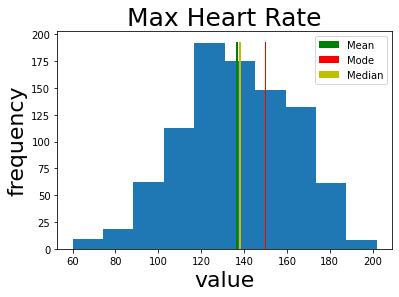

In [18]:
#Plotting Max heart rate ~my code
plt.hist(data_frame['MaxHR'])
plt.bar(data_frame['MaxHR'].mean(),height=193,color='g',label='Mean')
plt.bar(data_frame['MaxHR'].mode(),height=193,color='r',label='Mode')
plt.bar(data_frame['MaxHR'].median(),height=193,color='y',label='Median')
plt.legend()
plt.xlabel('value',size=22)
plt.ylabel('frequency',size=22)
plt.title('Max Heart Rate',size=25)
plt.show
print('Skewness >>  ' )
print(data_frame['MaxHR'].skew())
# Histogram Shape : Negatively Skewed

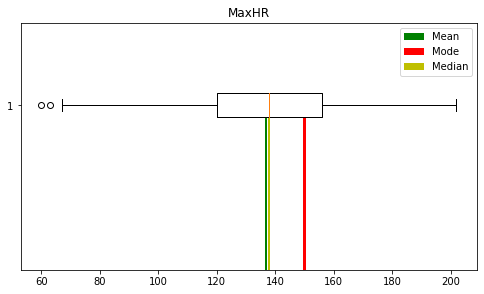

In [19]:
#ploting max hr as a box plot ~my code
plt.figure(figsize=(18,10))
plt.subplot(2,2,1)
plt.title('MaxHR')
plt.boxplot(data_frame['MaxHR'],vert=False)
plt.bar(data_frame['MaxHR'].mean(),height=0.93,color='g',label='Mean')
plt.bar(data_frame['MaxHR'].mode(),height=0.93,color='r',label='Mode')
plt.bar(data_frame['MaxHR'].median(),height=0.93,color='y',label='Median')
plt.legend()
plt.show()

Text(0.5, 0, 'Excercise Angina')

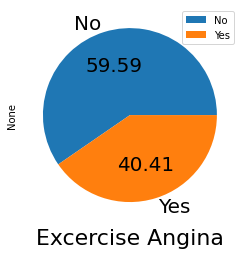

In [20]:
##Plotting Exercise Angina ~my code
data_frame.groupby('ExerciseAngina').size().plot(kind='pie',
                                         autopct='%.2f',
                                         textprops={'fontsize': 20},
                                         labels=['No','Yes'],
                                         legend=True).set_xlabel('Excercise Angina', size=22)


Text(0.5, 0, 'Heart Diseases')

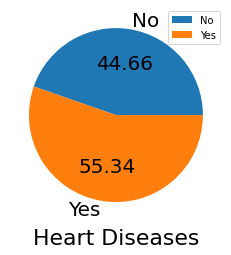

In [21]:
#Plotting Heart Disease ~my code
data_frame.groupby('HeartDisease').size().plot(kind='pie',
                                       autopct='%.2f',
                                       textprops={'fontsize': 20},
                                       label='',
                                       labels=['No','Yes'],
                                       legend=True).set_xlabel('Heart Diseases', size=22)


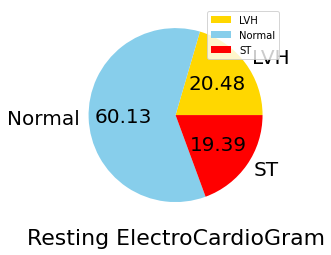

In [22]:
#Plotting Resting ElectroCardioGraph ~Samy's code with a bit of modification 'removed none from y axis and some unnecessery things i did not understand xd'

data_frame.groupby('RestingECG').size().plot( kind='pie',autopct='%.2f',
    legend=True, textprops={'fontsize': 20},
    colors=['gold' , 'skyblue','red' ],ylabel='').set_xlabel('Resting ElectroCardioGram', size=22 )
plt.show()


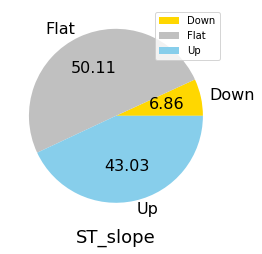

In [23]:
#Plotting Resting ElectroCardioGraph ~Samy's code 'renamed xlabel , weird colors tho'
data_frame.groupby('ST_Slope').size().plot( kind='pie',autopct='%.2f',
    legend=True, textprops={'fontsize': 16},
        colors=['gold' , 'silver' ,'skyblue'],
        ylabel='').set_xlabel('ST_slope', size=18)
plt.show()


						Oldpeak


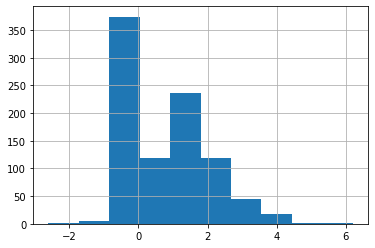

In [24]:
#Plotting Oldpeak ~Samy's code 'Porfecto'
data_frame.Oldpeak.hist()
print('\t\t\t\t\t\tOldpeak')
plt.show()
# Histogram Shape : Spiked

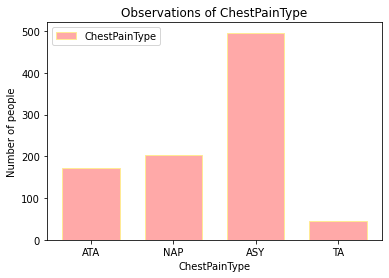

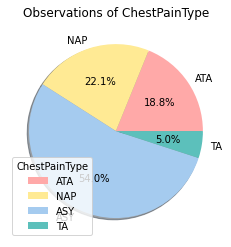

In [25]:
calculate_frequency_and_draw(data_frame, plt, "ChestPainType")


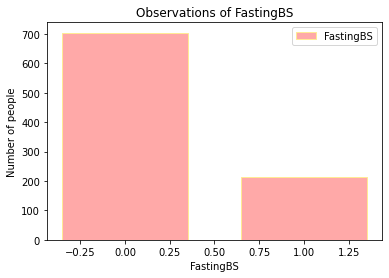

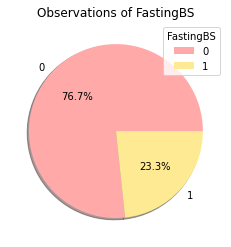

In [26]:
calculate_frequency_and_draw(data_frame, plt, "FastingBS")


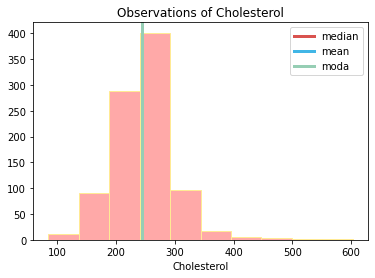

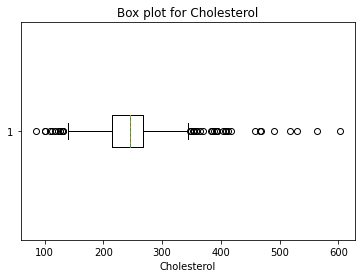

In [27]:
draw_histogram(plt, data_frame, "Cholesterol")
draw_boxplot(plt, data_frame, "Cholesterol")


In [28]:
calculate_central_tendency_and_dispersion(data_frame, "Cholesterol")


AttributeError: module 'statistics' has no attribute 'multimode'

In [ ]:
#Ploting the whole modified dataset ~My code
modified_x.hist()
plt.show

In [ ]:
correlations =pd.get_dummies(data_frame2)
corrmat = correlations.corr()
  
cg = sns.clustermap(corrmat, cmap ="YlGnBu", linewidths = 0.1);
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0)
  
cg

In [ ]:
correlations =pd.get_dummies(data_frame2)
correlations.corr()
 

The confidence interval using critical-z for Cholesterol = [234.64555129526465, 255.5344487047353]


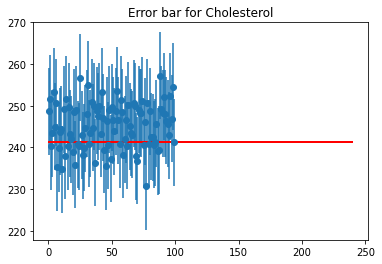

The confident interval using critical-t for Cholesterol = (234.7284828041376, 261.93151719586245)
The confidence interval using critical-z for Age = [51.362248360327804, 55.0577516396722]


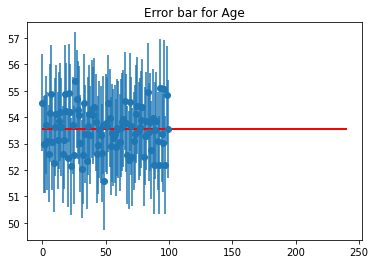

The confident interval using critical-t for Age = (52.191622368722555, 55.54837763127744)
The confidence interval using critical-z for RestingBP = [127.88326943083202, 135.13673056916795]


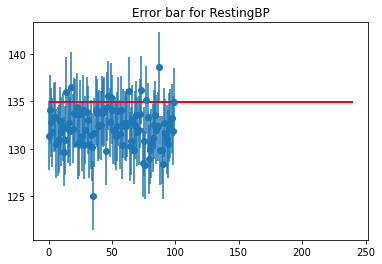

The confident interval using critical-t for RestingBP = (129.90526616812573, 137.29473383187425)
The confidence interval using critical-z for MaxHR = [130.86258488384652, 140.83741511615347]


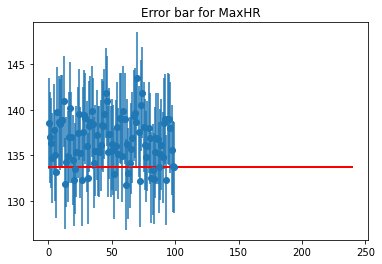

The confident interval using critical-t for MaxHR = (130.00974453659035, 140.91025546340967)
***********************************************************************************
Haven't fasting blood sugar proportion estimate = 73.0%
Haven't fasting blood sugar proportion estimate = 27.0%
Haven't heart disease proportion estimate = 42.0%
Haven't heart disease proportion estimate = 57.99999999999999%
don't make exercise angina proportion estimate = 57.99999999999999%
don't make exercise angina proportion estimate = 42.0%


In [29]:
import random

import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as stats
import pandas as pd
import math
def calculate_confidence_interval_critical_z(column_name, data, sample_size):
    population_data = np.array(data.loc[:, column_name])

    sample_of_column = np.random.choice(a=population_data, size=sample_size)
    sample_mean = sample_of_column.mean()
    #confidence interval of 95%
    z = stats.norm.ppf(q=0.975)
    # print(z_critical)

    population_std = population_data.std()

    margin_of_error = z * (population_std/math.sqrt(sample_size))

    confidence_interval = [(sample_mean - margin_of_error), (sample_mean + margin_of_error)]

    print("The confidence interval using critical-z for " + column_name + " = " + str(confidence_interval))

    #to draw the error bar
    intervals = []
    sample_means = []

    for sample_of_column in range(100): #create 100 randome sample and draw them
        sample_of_column = np.random.choice(a=population_data, size=sample_size)

        sample_mean = sample_of_column.mean()
        sample_means.append(sample_mean)

        z = stats.norm.ppf(q=0.975)
        population_std = population_data.std()

        margin_of_error = z * (population_std/math.sqrt(sample_size))

        confidence_interval = [(sample_mean - margin_of_error), (sample_mean + margin_of_error)]

        intervals.append(confidence_interval)

    #plt.figure(figsize=(35, 30))
    plt.errorbar(x=np.arange(0.1, 100, 1), #np.arange(start=0.1, stop=25, step=1)
                 y=sample_means,
                 yerr=[(top-bot)/2 for top, bot in intervals],
                 fmt='o')
    plt.hlines(xmin=0, xmax=240, y=sample_mean, linewidth=2, color='red')
    plt.title("Error bar for " + column_name)
    plt.show()

def calculate_confidence_interval_critical_t(column_name, data, sample_size):
    population_data = np.array(data.loc[:, column_name])

    sample_of_column = np.random.choice(a=population_data, size=sample_size)
    sample_mean = sample_of_column.mean()
    #confidence interval of 95%

    t = stats.t.ppf(q=0.975, df=sample_size - 1)
    sample_std = sample_of_column.std(ddof=1)
    sigma = sample_std / math.sqrt(sample_size)

    interval = stats.t.interval(alpha=0.95,
                                df=99,
                                loc=sample_mean,
                                scale=sigma)

    print("The confident interval using critical-t for " + column_name + " = " + str(interval))

def calculate_proportion_estimate_for_categorical_data(column_name, data, sample_size):
    population_data = np.array(data.loc[:, column_name])
    sample_of_column = random.sample(list(population_data), sample_size)

    if(column_name == "FastingBS"):
        for x in set(sample_of_column):
            if(x == '1'):
                print("Having fasting blood sugar proportion estimate = " + str((sample_of_column.count(x) / sample_size) * 100) + "%")
            else:
                print("Haven't fasting blood sugar proportion estimate = " + str((sample_of_column.count(x) / sample_size) * 100) + "%")

    elif (column_name == "HeartDisease"):
        for x in set(sample_of_column):
            if (x == '1'):
                print("Having heart disease proportion estimate = " + str((sample_of_column.count(x) / sample_size) * 100) + "%")
            else:
                print("Haven't heart disease proportion estimate = " + str((sample_of_column.count(x) / sample_size) * 100) + "%")

    elif (column_name == "ExerciseAngina"):
        for x in set(sample_of_column):
            if (x == '1'):
                print("Doing exercise angina proportion estimate = " + str((sample_of_column.count(x) / sample_size) * 100) + "%")
            else:
                print("don't make exercise angina proportion estimate = " + str((sample_of_column.count(x) / sample_size) * 100) + "%")
    else:
        for x in set(sample_of_column):
            print(x + " proportion estimate = " + str((sample_of_column.count(x) / sample_size) * 100) + "%")

########################################################################################################################
my_data = pd.read_csv("heart.csv")

calculate_confidence_interval_critical_z("Cholesterol", my_data, 100)
calculate_confidence_interval_critical_t("Cholesterol", my_data, 100)
calculate_confidence_interval_critical_z("Age", my_data, 100)
calculate_confidence_interval_critical_t("Age", my_data, 100)
calculate_confidence_interval_critical_z("RestingBP", my_data, 100)
calculate_confidence_interval_critical_t("RestingBP", my_data, 100)
calculate_confidence_interval_critical_z("MaxHR", my_data, 100)
calculate_confidence_interval_critical_t("MaxHR", my_data, 100)
print("***********************************************************************************")
calculate_proportion_estimate_for_categorical_data("FastingBS", my_data, 100)
calculate_proportion_estimate_for_categorical_data("HeartDisease", my_data, 100)
calculate_proportion_estimate_for_categorical_data("ExerciseAngina", my_data, 100)

In [30]:
#-------------------------------------------------------------------------------------------------------------------------------
#Code used for correcting data 

#>> correcting data
# data_frame['Cholesterol'] = data_frame['Cholesterol'].replace(0,np.NaN)
# mean=int(data_frame['Cholesterol'].mean(skipna=True))
# data_frame['Cholesterol'] ] data_frame['Cholesterol'].replace(np.NaN,mean)
#--there was some null values so we set em to the average

#>> manipulating categorial data
# data_frame['Sex'] = data_frame['Sex'].apply(lambda x : 1 if x == 'M' else 0)
# data_frame['ExerciseAngina'] = data_frame['ExerciseAngina'].apply(lambda x : 1 if x == 'Y' else 0)
#>> Overwritting data
# data_frame.to_csv("heart.csv", index=False)
# data_frame.describe()

#-------------------------------------------------------------------------------------------------------------------------------
#>> Splitting Data
#xTrain, xTest, yTrain, yTest = train_test_split(modified_x, y, test_size = 0.2, random_state = 42)

#-------------------------------------------------------------------------------------------------------------------------------
#>> KNN Model Implementation :

# from sklearn.preprocessing import StandardScaler
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import f1_score

# sc_x = StandardScaler()
# x_train_KNN = sc_x.fit_transform(xTrain)
# x_test_KNN = sc_x.fit_transform(xTest)
# classifier = KNeighborsClassifier(n_neighbors=13 ,p=2,metric='euclidean')
# classifier.fit(x_train_KNN,yTrain)
#>> Saving model
#joblib.dump(classifier,'KNN Model.joblib')
#>> Predicating and saving accuracy
# y_pred = classifier.predict(x_test_KNN)
# print(f1_score(yTest,y_pred))
# print(accuracy_score(yTest,y_pred))
#-------------------------------------------------------------------------------------------------------------------------------
#--Decision tree model implementation
#>> Creating model 
# decision_tree =DecisionTreeClassifier()
# decision_tree.fit(xTrain,yTrain)

#>>Accuracy score
# dtPredictions=decision_tree.predict(xTest)
# accuracy_score(yTest , dtPredictions)
#-------------------------------------------------------------------------------------------------------------------------------
#>> linear Regression
# LR = LinearRegression()
# LR.fit(xTrain,yTrain)
#>> Predicating values
# yPrediction  =  LR.predict(xTest)
# yPrediction 
#>> accuracy score 
# score=r2_score(yTest,yPrediction )
# print('r squared is : ',score)
# print('Mean squared eror is : ',mean_squared_error(yTest,yPrediction ))
# print('Root mean squared error is : ',np.sqrt(mean_squared_error(yTest,yPrediction )))

from sklearn.preprocessing import StandardScaler
import math
sc_x = StandardScaler()
meow = pd.read_csv('meow.csv')
xTrain, xTest, yTrain, yTest = train_test_split(modified_x, y, test_size = 0.2, random_state = 42)


#loading models
linear_regression_model = joblib.load('Linear_Regression_Model.joblib')

#Accuracy(about 55%) poor
decision_tree_model = joblib.load('DecisionTreeModel.joblib')
#Accuracy(about 80~85%) Excellent

KNN_model = joblib.load('KNN_Model.joblib')
#Accuracy 85%

#Decision Tree trial code
dtPredictions=decision_tree_model.predict(meow)
print('Decision Tree >>')
print(dtPredictions[0])

#KNN Trial Code >
x_test_KNN = sc_x.fit_transform(meow)
y_pred = KNN_model.predict(x_test_KNN)
print('KNN >>')
print(y_pred[0])

#Linear Regression
lrpred = linear_regression_model.predict(meow)
print('Linear Regression >>') 
print(round(lrpred[0]))

Decision Tree >>
0
KNN >>
0
Linear Regression >>
0


c:\users\mido_\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\base.py:338: UserWarning: Trying to unpickle estimator LinearRegression from version 0.24.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
c:\users\mido_\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\base.py:338: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.24.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
c:\users\mido_\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\base.py:338: UserWarning: Trying to unpickle estimator KNeighborsClassifier from version